In [ ]:
#imports
import numpy as np
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from skimage import io
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  HistGradientBoostingClassifier


In [6]:

images = []
flat_data = []
target = []
#images to be classified as:
# labesls : Mer= 0 and Ailleurs = 1
categories = ["Mer","Ailleurs"]


for c in categories:
    print("categorie is : ",c,"\t label is ", categories.index(c))
    target_class = categories.index(c)
    images_path = os.path.join("./Data",c)
    for img in os.listdir(images_path):
        image = io.imread(os.path.join(images_path, img))  
        resized_image = resize(image, (500, 500,3))
        images.append(resized_image)
        flat_data.append(resized_image.flatten())
        target.append(target_class)

flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

df2 = pd.DataFrame(flat_data)
df2['Status'] = target

x = df2.iloc[:,:-1].values
y = target

print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

# Stratify ensures every image is divided in equal proportions (no bias)
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=109,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_train.shape)

classifieur_gb =AdaBoostClassifier(learning_rate=0.5,n_estimators=10)
classifieur_gb.fit(x_train, y_train)

y_predits = classifieur_gb.predict(x_test)
print("Les vraies classes :")
print(y_test)
print("Les classes prédites :")
print(y_predits)

print("\n ---> the Accuracy is : ")
accuracy_score(y_test,y_predits)

categorie is :  Mer 	 label is  0
categorie is :  Ailleurs 	 label is  1
Input data dimensions: (414, 750000)
Output data dimensions: (414,)
Dimensions of input training data: (289, 750000)
Dimensions of input testing data: (125, 750000)
Dimensions of output training data: (289,)
Dimensions of output testing data: (289,)
Les vraies classes :
[0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 0]
Les classes prédites :
[0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 1 1 1 1 0 0]

 ---> the Accuracy is : 


0.792

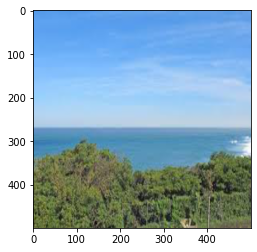

In [7]:
plt.imshow(images[0])

In [69]:
df2

,0,1,2,3,4,5,6,7,8,9,...,749991,749992,749993,749994,749995,749996,749997,749998,749999,Status
0,0.556895,0.662777,0.768660,0.556895,0.662777,0.768660,0.556895,0.662777,0.768660,0.557674,...,0.013709,0.199838,0.349756,0.015761,0.211956,0.371082,0.010428,0.214475,0.378370,0
1,0.691655,0.742729,0.672224,0.690165,0.743738,0.669569,0.696019,0.746465,0.674352,0.692850,...,0.230287,0.246830,0.221122,0.226690,0.246147,0.222544,0.224141,0.243772,0.221035,0
2,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.993486,1.000000,0.997408,0.993486,1.000000,0.997408,0.993486,1.000000,0.997408,0
3,0.815686,0.847059,0.988235,0.815686,0.847059,0.988235,0.815686,0.847059,0.988235,0.815686,...,0.075725,0.193373,0.428667,0.082251,0.199898,0.435192,0.084902,0.202549,0.437843,0
4,0.663814,0.726559,0.789304,0.659859,0.722604,0.785349,0.663382,0.726127,0.788872,0.663256,...,0.537904,0.553590,0.557841,0.553720,0.569406,0.580419,0.560315,0.576001,0.587766,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.427451,0.576471,0.862745,0.427451,0.576471,0.862745,0.427451,0.576471,0.862745,0.427451,...,0.074127,0.105500,0.023147,0.066973,0.098345,0.015992,0.065672,0.097044,0.014691,1
114,0.773994,0.730884,0.696888,0.775536,0.732427,0.698431,0.780243,0.737133,0.703137,0.788061,...,0.143800,0.167316,0.034009,0.143800,0.165747,0.035578,0.143800,0.165233,0.036092,1
115,0.409616,0.244910,0.254510,0.410969,0.246263,0.256678,0.418149,0.253443,0.268188,0.409462,...,0.280660,0.353927,0.248797,0.305003,0.378269,0.271767,0.309589,0.382855,0.276095,1
116,0.134820,0.162271,0.029227,0.134552,0.162003,0.029002,0.130701,0.158152,0.025772,0.161969,...,0.145098,0.164706,0.039216,0.145098,0.164706,0.039216,0.145098,0.164706,0.039216,1


### Rapport de Classification 

In [8]:
#classification report
from sklearn.metrics import classification_report
y_true= y_test
y_predicted = y_predits
target_names = ["Mer: '0' ", "Ailleurs: '1'"]
print(classification_report(y_true, y_predicted, target_names= target_names))

               precision    recall  f1-score   support

    Mer: '0'        0.76      0.86      0.81        63
Ailleurs: '1'       0.83      0.73      0.78        62

     accuracy                           0.79       125
    macro avg       0.80      0.79      0.79       125
 weighted avg       0.80      0.79      0.79       125



### Sauvegarde du model en utilisant 'pickle'

In [9]:
import pickle

pickle.dump(classifieur_gb, open("image_classifier_gradinat.py","wb"))

test_model_gradinat = pickle.load(open("image_classifier_gradinat.py","rb"))


### testing a new image : not in out data set

data =  [[0.07058824 0.22352941 0.58431373 ... 0.53520454 0.70954484 0.89206728]]
Prediction : Mer


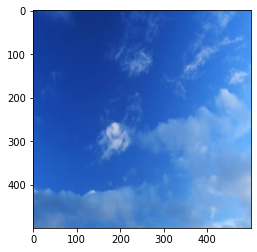

In [10]:
# Testing for a new image
flat_data = []
img_array = plt.imread('data_test/blueSky.webp')
# Resize image
img_resized = resize(img_array,(500,500,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resized)
print("data = ",flat_data)

y_output = test_model_gradinat.predict(flat_data)
y_output = categories[y_output[0]]
print("Prediction :",y_output)